## Model to predict Data Science Salarys

### Choosing the relevant columns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('salary_data')

In [14]:
df.columns

In [15]:
#df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Unnamed: 0.1', axis=1)

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'min_salary',
       'max_salary', 'avg_salary', 'desc_len', 'City', 'State', 'Remote',
       'Country', 'Min Revenue', 'Max Revenue', 'Avg Revenue', 'Age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority'],
      dtype='object')

In [16]:
df_model = df[['avg_salary', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'State', 'Age', 'python_yn', 'spark', 'aws', 'excel', 'seniority', 'desc_len']]

### Get dummy variables

In [17]:
df_dum = pd.get_dummies(df_model)
df_dum

,avg_salary,Rating,Age,python_yn,spark,aws,excel,desc_len,Size_1 to 50 Employees,Size_10000+ Employees,...,State_OH,State_PA,State_TX,State_UT,State_VA,State_WA,State_WI,seniority_jr,seniority_na,seniority_senior
0,136.5,4.1,66,1,1,0,0,6314,False,True,...,False,False,False,False,False,False,False,False,True,False
1,124.5,4.2,137,1,1,1,0,7066,False,True,...,False,False,False,False,False,False,False,False,True,False
2,150.0,4.3,42,0,0,0,0,-1,False,True,...,False,False,False,False,False,False,False,False,True,False
3,248.5,3.4,8,0,0,0,0,-1,False,False,...,False,False,False,False,False,False,False,False,True,False
4,187.0,4.2,48,1,0,1,0,4014,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,150.0,4.3,13,1,0,1,1,6261,False,False,...,False,False,False,False,False,False,False,False,True,False
1004,124.5,3.8,60,1,0,0,1,5469,False,False,...,False,False,False,False,False,False,False,False,True,False
1005,125.0,4.0,78,1,0,0,0,3657,False,False,...,False,False,False,False,False,False,False,False,False,True
1006,126.5,4.7,11,1,1,0,0,5922,True,False,...,False,False,False,False,False,False,False,False,True,False


### Train / test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df_dum.drop('avg_salary', axis = 1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
import statsmodels.api as sm

In [22]:
X_sm = X = sm.add_constant(X)
X_sm.dtypes

const               float64
Rating              float64
Age                   int64
python_yn             int64
spark                 int64
                     ...   
State_WA               bool
State_WI               bool
seniority_jr           bool
seniority_na           bool
seniority_senior       bool
Length: 125, dtype: object

In [24]:
X_sm = X_sm.astype(int)
model = sm.OLS(y, X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     20.57
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          3.71e-169
Time:                        00:03:29   Log-Likelihood:                -4674.8
No. Observations:                1008   AIC:                             9542.
Df Residuals:                     912   BIC:                         1.001e+04
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               81.9294      7.600     10.780      0.000      67.013      96.846
Rating                                              -4.7169      2.325     -2.029      0.043      -9.280      -0.154
Age                                                 -0.1027      0.035     -2.912      0.004      -0.172      -0.033
python_yn                                          -32.3818      3.211    -10.085      0.000     -38.683     -26.080
spark                                               15.4175      3.106      4.965      0.000       9.323      21.512
aws                                                -20.0576      3.034     -6.610      0.000     -26.013     -14.102
excel                                                4.6537      2.832      1.643      0.101      -0.904      10.211
desc_len                                             0.0042      0.001      6.147      0.000       0.003       0.006
Size_1 to 50 Employees                              21.3405     10.254      2.081      0.038       1.217      41.464
Size_10000+ Employees                              -10.2377      5.761     -1.777      0.076     -21.544       1.068
Size_1001 to 5000 Employees                         22.8971      4.155      5.510      0.000      14.742      31.052
Size_201 to 500 Employees                            4.1218      5.459      0.755      0.450      -6.592      14.835
Size_5001 to 10000 Employees                       -20.2380      6.938     -2.917      0.004     -33.855      -6.621
Size_501 to 1000 Employees                          45.8762      7.577      6.054      0.000      31.005      60.748
Size_51 to 200 Employees                           -20.9913      6.983     -3.006      0.003     -34.697      -7.286
Size_Unknown                                        39.1608     14.498      2.701      0.007      10.707      67.615
Type of ownership_College / University              16.1659      5.353      3.020      0.003       5.661      26.671
Type of ownership_Company - Private                 32.4579      6.006      5.404      0.000      20.671      44.245
Type of ownership_Company - Public                  23.1004      6.338      3.645      0.000      10.662      35.539
Type of ownership_Franchise                         18.2738      6.946      2.631      0.009       4.641      31.907
Type of ownership_Government                       -23.1248     11.294     -2.048      0.041     -45.290      -0.960
Type of ownership_Nonprofit Organization            28.8108     25.471      1.131      0.258     -21.179      78.800
Type of ownership_Self-employed                     24.3768     16.215      1.503      0.133      -7.446      56.200
Type of ownership_Subsidiary or Business 

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3)

array([-22.081129  , -17.75361476, -18.55199117])

### Lasso Regression

In [28]:
# Lasso regression
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-20.624599914342205

In [29]:
alpha = []
error = []

In [30]:
for i in range(1, 100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3)))

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.558e+02, tolerance: 1.094e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.078e+04, tolerance: 1.039e+02
  model = cd_fast.enet_coordinate_descent(


,alpha,error
0,0.01,-19.680007


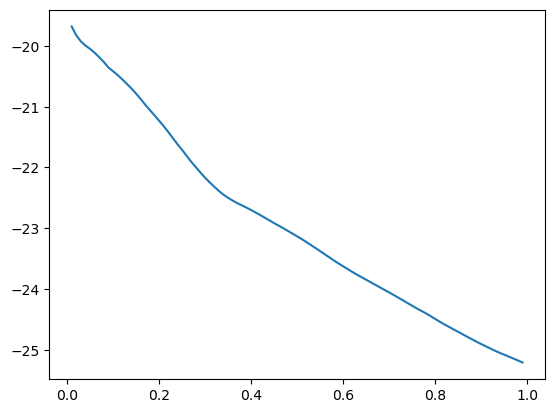

In [31]:
plt.plot(alpha, error)

err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns = ['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor()
np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3))

-6.387512243159019

In [34]:
cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=3)

array([-8.18897644, -4.98451448, -6.12833606])

### Tune Models: GridsearchCV

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameters = {'n_estimators': range(10, 300, 10), 'criterion':('squared_error', 'absolute_error'), 'max_features':('sqrt', 'log2', None)}

gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('sqrt', 'log2', None),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [58]:
gs.best_score_

-5.822077994505171

In [59]:
gs.best_estimator_

RandomForestRegressor(max_features='log2', n_estimators=210)

### test esembles

In [60]:
# test esembles
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [61]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, tpred_lm)
mean_absolute_error(y_test, tpred_lml)
mean_absolute_error(y_test, tpred_rf)

2.4815473076082553

In [62]:
mean_absolute_error(y_test, (tpred_lm+tpred_rf)/2)

10.185398253739322